In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import needed packages
import cv2
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D,Dropout,SeparableConv2D,BatchNormalization, Activation, Dense
from keras.applications.mobilenet import MobileNet
from keras.optimizers import Adam

In [ ]:
# Base model without Fully connected Layers
base_model = MobileNet(include_top=False, weights='imagenet', input_shape=(224,224,3))
x=base_model.output

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
num_class = 3

# Add some new Fully connected layers to 
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x = Dropout(0.25)(x)
x=Dense(512,activation='relu')(x) 
x = Dropout(0.25)(x)
preds=Dense(num_class, activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
for i,layer in enumerate(model.layers):
  print("{}: {}".format(i,layer))

0: <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4f5303af98>
1: <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f528ff588>
2: <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f4f528fffd0>
3: <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x7f4f520dceb8>
4: <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7f4f4e9b7f60>
5: <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f4f4e9cc358>
6: <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x7f4f4e9cc7f0>
7: <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f4e9d5160>
8: <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f4f4e95b358>
9: <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x7f4f4e95b9e8>
10: <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f4f4e961f28>
11: <tensorflow.pyt

In [ ]:
for layer in model.layers[:87]:
    layer.trainable=False
for layer in model.layers[87:]:
    layer.trainable=True

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input,
                                 validation_split=0.4)

train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Dataset',
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 class_mode='categorical',
                                                 subset='training')


validation_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Dataset', # same directory as training data
                                                target_size=(224,224),
                                                batch_size=64,
                                                class_mode='categorical',
                                                subset='validation') # set as validation data

Found 108 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [ ]:
epochs = 50
learning_rate = 0.0005
decay_rate = learning_rate / epochs
opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay_rate, amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
step_size_train = train_generator.n/train_generator.batch_size
step_size_val = validation_generator.samples // validation_generator.batch_size
history = model.fit_generator(
                   generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator, 
                   validation_steps=step_size_val,
                   
                   epochs=10)
model.save('rockpaper.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1/1 [==============================] - 80s 80s/step - loss: 1.2342 - accuracy: 0.3681 - val_loss: 0.8101 - val_accuracy: 0.7812
Epoch 2/10
1/1 [==============================] - 24s 26s/step - loss: 0.2724 - accuracy: 0.9383 - val_loss: 0.6649 - val_accuracy: 0.6406
Epoch 3/10
1/1 [==============================] - 24s 25s/step - loss: 0.1649 - accuracy: 0.9450 - val_loss: 0.3376 - val_accuracy: 0.9531
Epoch 4/10
1/1 [==============================] - 24s 26s/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.3971 - val_accuracy: 0.7812
Epoch 5/10
1/1 [==============================] - 24s 26s/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.5968 - val_accuracy: 0.7812
Epoch 6/10
1/1 [==============================] - 25s 23s/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 0.4738 - val_accuracy: 0.7969
Epoch 7/10
1/1 [==============================] - 24s 22s/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.3639 - val_accuracy: 0.7656
Epoch 8/10
1/1 [===========

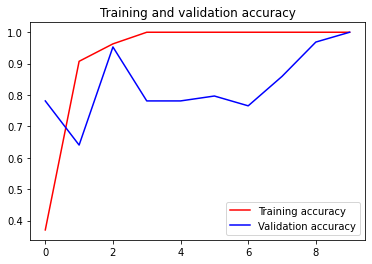

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()



plt.show()

<Figure size 432x288 with 0 Axes>

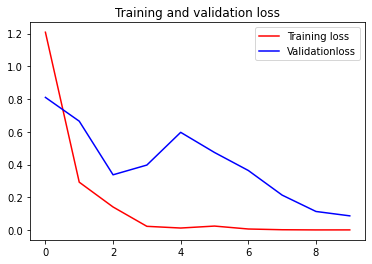

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validationloss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


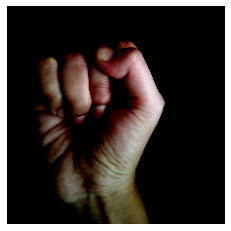

True label: Rock
Predicted label: Rock


In [ ]:
import matplotlib.pyplot as plt
def get_class_string_from_index(index):
   for class_string, class_index in validation_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(validation_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [ ]:
import cv2
import tensorflow as tf

CATEGORIES= ['Paper','Rock','Scissor']
def prepare(filepath):
    IMG_SIZE=224
    img_array=cv2.imread(filepath)
    img_array = img_array / 255.0
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)

prediction = model.predict(prepare('/content/drive/My Drive/Dataset/Scissor/2 (16).jpg'))
prediction = np.argmax(prediction,-1)

print(prediction)
print(CATEGORIES[int(prediction[0])])

[2]
Scissor


Testing the model

In [19]:
import cv2
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D,Dropout,SeparableConv2D,BatchNormalization, Activation, Dense
from keras.applications.mobilenet import MobileNet
from keras.optimizers import Adam

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
model = tf.keras.models.load_model('/content/drive/My Drive/Models/rockpaper.h5')

In [23]:
train_datagen=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input,
                                 validation_split=0.4)

train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Dataset',
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 class_mode='categorical',
                                                 subset='training')


validation_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Dataset', # same directory as training data
                                                target_size=(224,224),
                                                batch_size=64,
                                                class_mode='categorical',
                                                subset='validation') # set as validation data

Found 108 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


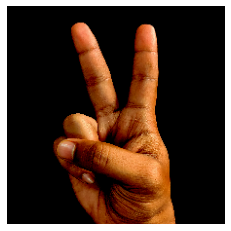

True label: Scissor
Predicted label: Scissor


In [24]:
import matplotlib.pyplot as plt
def get_class_string_from_index(index):
   for class_string, class_index in validation_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(validation_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [25]:
import cv2
import tensorflow as tf

CATEGORIES= ['Paper','Rock','Scissor']
def prepare(filepath):
    IMG_SIZE=224
    img_array=cv2.imread(filepath)
    img_array = img_array / 255.0
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)

prediction = model.predict(prepare('/content/drive/My Drive/Dataset/Scissor/2 (16).jpg'))
prediction = np.argmax(prediction,-1)

print(prediction)
print(CATEGORIES[int(prediction[0])])

[2]
Scissor
